# Week 11 Problem Set


In [147]:
# %load_ext nb_mypy
# %nb_mypy On

In [148]:
from typing import TypeAlias
from typing import Optional, Any    

Number: TypeAlias = int | float

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as axes
from IPython.display import display


## Cohort Session

**CS0.** Do the following tasks before you start with the first cohort session.

**Task 1.** Paste the following functions from your previous work:
- `get_features_targets()`
- `normalize_z()`
- `prepare_feature()`
- `prepare_target()`
- `split_data()`


In [150]:
def normalize_z(array: np.ndarray, 
                columns_means: Optional[np.ndarray]=None, 
                columns_stds: Optional[np.ndarray]=None) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    
    if (columns_means is None):
        columns_means = array.mean(axis=0)
    if (columns_stds is None):
        columns_stds = array.std(axis=0)
    
    out = (array - columns_means) / columns_stds    
    
    return out, columns_means, columns_stds


def get_features_targets(df: pd.DataFrame, 
                         feature_names: list[str], 
                         target_names: list[str]) -> tuple[pd.DataFrame, pd.DataFrame]:
    
    df_feature = df[feature_names]
    df_target = df[target_names]
    
    return df_feature, df_target

def prepare_feature(np_feature: np.ndarray) -> np.ndarray:
    ones = np.ones(shape = (np_feature.shape[0], 1))
    
    return np.concatenate((ones, np_feature), axis = 1)

def split_data(df_feature: pd.DataFrame, df_target: pd.DataFrame, 
               random_state: Optional[int]=None, 
               test_size: float=0.5) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    
    np.random.seed(random_state)
    index = np.random.choice(df_feature.shape[0], int(df_feature.shape[0]*test_size), replace = False)
    df_feature_train = df_feature.drop(index)
    df_feature_test = df_feature.loc[index]
    df_target_train = df_target.drop(index)
    df_target_test = df_target.loc[index]
    return df_feature_train, df_feature_test, df_target_train, df_target_test

**Task 2.** Load the breast cancer data from `breast_cancer_data.csv` into a Data Frame. 

In [151]:
# read breast_cancer_data.csv
df: pd.DataFrame = pd.read_csv("breast_cancer_data.csv")

###
### YOUR CODE HERE
###

df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**Task 3.** Do the following tasks.

- Read the following columns
    - feature: `radius_mean`
    - target: `diagnosis`
- Normalize the feature column using z normalization.

In [152]:
# extract the feature and the target
df_feature, df_target = get_features_targets(df, ["radius_mean"], ["diagnosis"])

# normalize the feature
array_feature,_,_ = normalize_z(df_feature.to_numpy())

###
### YOUR CODE HERE
###


**Task 4.** Write a function `replace_target()` to replace the `diagnosis` column with the following mapping:
    - `M`: `1`, this means that malignant cell are indicated as `1` in our new column.
    - `B`: `0`, this means that benign cell are indicated as `0` in our new column.
    
The function should takes in the following:

- `df_target`: the target data frame
- `target_name`: which is the column name of the target data frame
- `map`: which is a dictionary containing the map
    
It should returns a new data frame with the same column name but with its values changed according to the mapping.

In [153]:
def replace_target(df_target: pd.DataFrame, 
                   target_name: str, map_vals: dict[Any, Any]) -> pd.DataFrame:
    df_out = df_target.copy()
    df_out[target_name] = df_out[target_name].apply(lambda x: map_vals[x])
    return df_out

In [154]:
df_target: pd.DataFrame = replace_target(df_target, "diagnosis", {'M': 1, 'B': 0})
df_target

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


**Task 5.** Do the following tasks.
- Change feature to Numpy array and append constant 1 column.
- Change target to Numpy array

In [155]:
# change feature data frame to numpy array and append column 1
feature: np.ndarray = prepare_feature(array_feature)

# change target data frame to numpy array
target: np.ndarray = df_target.to_numpy()

###
### YOUR CODE HERE
###


**CS1.** *Logistic function:* Write a function to calculate the hypothesis using a logistic function. Recall that the hypothesis for a logistic regression model is written as:

$$\mathbf{p}(x) = \frac{1}{1 + e^{-\mathbf{X}\mathbf{b}}}$$

The shape of the input is as follows:
- $\mathbf{b}$: is a column vector for the parameters
- $\mathbf{X}$: is a matrix where the number of rows are the number of data points and the the number of columns must the same as the number of parameters in $\mathbf{b}$.

Note that you need to ensure that the output is a **column vector**. 

You can use the following functions:
- `np.matmul(array1, array2)`: which is to perform matrix multiplication on the two numpy arrays.
- `np.exp()`: which is to calculate the function $e^x$

In [156]:
def calc_logreg(X: np.ndarray, beta: np.ndarray) -> np.ndarray:
    X: np.ndarray = X.astype(float)
    beta: np.ndarray = beta.astype(float)
    z = - (np.matmul(X,beta))
    return 1/(1+ np.exp(z))

In [157]:
beta: np.ndarray = np.array([0])
x: np.ndarray = np.array([0])
ans: np.ndarray = calc_logreg(x, beta)
assert ans == 0.5

beta: np.ndarray  = np.array([2])
x: np.ndarray  = np.array([40])
ans: np.ndarray  = calc_logreg(x, beta)
assert np.isclose(ans, 1.0)

beta: np.ndarray  = np.array([2])
x: np.ndarray  = np.array([-40])
ans: np.ndarray  = calc_logreg(x, beta)
assert np.isclose(ans, 0.0)

beta: np.ndarray  = np.array([[1, 2, 3]])
x: np.ndarray  = np.array([[3, 2, 1]])
ans: np.ndarray  = calc_logreg(x, beta.T)
assert np.isclose(ans.all(), 1.0)

beta: np.ndarray  = np.array([[1, 2, 3]])
x: np.ndarray  = np.array([[3, 2, 1], [3, 2, 1]])
ans: np.ndarray  = calc_logreg(x, beta.T)
assert ans.shape == (2, 1)
assert np.isclose(ans.all(), 1.0)

In [158]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**CS2.** *Cost Function:* Write a function to calculate the cost function for logistic regression. Recall that the cost function for logistic regression is given by:

$$J(\beta) = -\frac{1}{m}\left[\Sigma_{i=1}^m y^i \log(p(x^i)) + (1 - y^i) \log(1 - p(x^i))\right]$$

You can use the following function in your code:
- `np.where(condition, then_expression, else_expression)`

In [159]:
def compute_cost_logreg(beta: np.ndarray, 
                        X: np.ndarray, 
                        y: np.ndarray) -> Number:
    np.seterr(divide = 'ignore') 
    
    m = X.shape[0]
    y_hat = calc_logreg(X, beta)
    log_p_x = np.log(y_hat)
    log_one_min_p_x = np.log(1-y_hat)
    
    J = -(1/m) * np.sum(np.where(y==1, log_p_x, log_one_min_p_x))
    
    np.seterr(divide = 'warn')
    J = np.squeeze(J)
    return J

In [160]:
y: np.ndarray = np.array([[1]])
X: np.ndarray  = np.array([[10, 40]])
beta: np.ndarray  = np.array([[1, 1]]).T
ans: Number = compute_cost_logreg(beta, X, y)
print(ans)
assert np.isclose(ans, 0)

y: np.ndarray  = np.array([[0]])
X: np.ndarray  = np.array([[10, 40]])
beta: np.ndarray  = np.array([[-1, -1]]).T
ans: Number = compute_cost_logreg(beta, X, y)
print(ans)
assert np.isclose(ans, 0)

-0.0
-0.0


In [161]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**CS3.** *Gradient Descent:* Recall that the update functions can be written as a matrix multiplication.

$$\mathbf{b} = \mathbf{b} - \alpha\frac{1}{m}\mathbf{X}^T(\mathbf{p} - \mathbf{y}) $$

Write a function called `gradient_descent_logreg()` that takes in four parameters:
- `X`: is a 2-D numpy array for the features
- `y`: is a vector array for the target
- `beta`: is a column vector for the initial guess of the parameters
- `alpha`: is the learning rate
- `num_iters`: is the number of iteration to perform

The function should return two arrays:
- `beta`: is coefficient at the end of the iteration
- `J_storage`: is the array that stores the cost value at each iteration

The solution is similar to Linear Regression gradient descent function with two differences:
- you need to use `log_regression()` to calculate the hypothesis
- you need to use `compute_cost_logreg()` to calculate the cost

In [162]:
def gradient_descent_logreg(X: np.ndarray, 
                            y: np.ndarray, 
                            beta: np.ndarray, 
                            alpha: float,
                            num_iters: int) -> tuple[np.ndarray, np.ndarray]:
    m = X.shape[0]
    J_storage = np.zeros((num_iters, 1))
    
    for i in range(0, num_iters):
        y_hat = calc_logreg(X, beta)
        beta = beta - (alpha) * (1/m) * np.matmul(X.T, y_hat - y)
        cost = compute_cost_logreg(beta, X, y)
        J_storage[i] = cost
    
    return beta, J_storage

    # J_storage = np.zeros((num_iters,1))
    # m,_ = X.shape
    # for i in range (0, num_iters):
    #     y_hat = calc_logreg(X,beta)
    #     beta = beta - (alpha/m) * np.matmul(X.T , (y_hat - y))
    #     cost = compute_cost_logreg(beta,X,y)
    #     J_storage[i] = cost
        
    # return beta, J_storage

In [163]:
iterations: int = 1500
alpha: float = 0.01
beta: np.ndarray = np.zeros((2,1))
beta, J_storage = gradient_descent_logreg(feature, target, beta, alpha, iterations)

print(beta)
assert beta.shape == (2, 1)
assert np.isclose(beta[0][0], -0.56631, rtol=1e-3)
assert np.isclose(beta[1][0], 1.93742, rtol=1e-3)

[[-0.56630978]
 [ 1.93742212]]


In [164]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


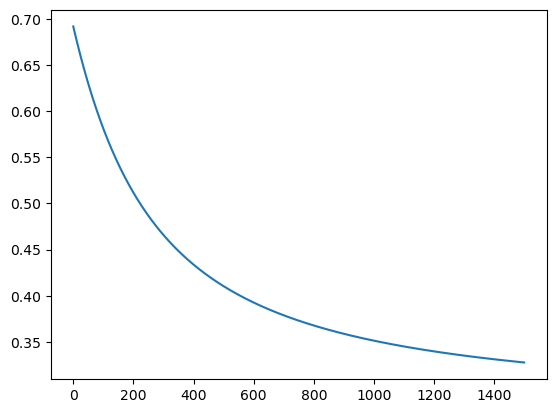

In [165]:
plt.plot(J_storage)

**CS4.** *Predict:* Write two functions `predict_logreg()` and `predict_norm()` that calculate the straight line equation given the features and its coefficient.
- `predict_logreg()`: this function should standardize the feature using z normalization, change it to a Numpy array, and add a column of constant 1s. You should use `prepare_feature()` for this purpose. Lastly, this function should also call `predict_norm()` to get the predicted y values.
- `predict_norm()`: this function should calculate the hypothesis or its probability using `calc_logreg()` and categorize it to either 0 or 1 based on its probability. If the probability is greater or equal to 0.5, it should be classified as class 1. Otherwise, it is classified as 0.

You can use the following function in your code:
- `np.where()`

In [166]:
def predict_norm(X: np.ndarray, beta: np.ndarray) -> np.ndarray:
    y_hat_test = calc_logreg(X, beta)
    return np.where(y_hat_test >= 0.5, 1.0, 0)

In [167]:
def predict_logreg(array_feature: np.ndarray, 
                   beta: np.ndarray, 
                   means: Optional[np.ndarray]=None, 
                   stds: Optional[np.ndarray]=None) -> np.ndarray:
    X, means, stds = normalize_z(array_feature, means, stds)
    X = prepare_feature(X)
    
    return predict_norm(X, beta)

In [168]:
df_feature, df_target = get_features_targets(df, ["radius_mean"], ["diagnosis"])
df_target: pd.DataFrame = replace_target(df_target, "diagnosis", {'M': 1, 'B': 0})
pred: np.ndarray = predict_logreg(df_feature.to_numpy(), beta)
print(pred.mean(), pred.std())
assert isinstance(pred, np.ndarray)
assert np.isclose(pred.mean(), 0.28998)
assert np.isclose(pred.std(), 0.45375)

0.28998242530755713 0.4537539182423709


In [169]:
means: np.ndarray = np.array([0]).reshape(1,1)
stds: np.ndarray = np.array([1]).reshape(1,1)
beta: np.ndarray =np.array([[-0.56630289], [ 1.93763591]])
input_1row: np.ndarray = np.array([[2.109139]])
pred_1row: np.ndarray = predict_logreg(input_1row, beta, means, stds)
assert pred_1row[0][0] == 1

In [170]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


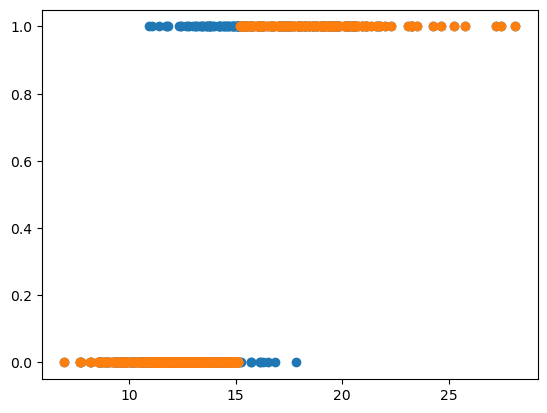

In [171]:
plt.scatter(df_feature, df_target)
plt.scatter(df_feature, pred)

**CS5.** *Multiple features and splitting of data set:* 

Do the following task in the code below:
- Read the following column names as the features: `"radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean"`
- Read the column `diagnosis` as the target. Change the value from `M` and `B` to `1` and `0` respectively.
- Split the data set with 30% test size and `random_state = 100`.
- Normalize the training feature data set using `normalize_z()` function.
- Convert to numpy array both the target and the features using `prepare_feature()` and `prepare_target()` functions.
- Call `gradient_descent()` function to get the parameters using the training data set.
- Call `predict()` function on the test data set to get the predicted values.

In [172]:
columns: list[str] = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean"]

# extract the features and the target columns
df_features, df_target = get_features_targets(df,columns,["diagnosis"])

# replace the target values using from string to integer 0 and 1
df_target: pd.DataFrame = replace_target(df_target, "diagnosis", {"M": 1, "B": 0})

# split the data with random_state = 100 and 30% test size
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, 100, 0.3)

# normalize the features
array_features_train_z, means, stds = normalize_z(df_features_train.to_numpy())

# change the feature columns to numpy array and append column of 1s
features: np.ndarray = prepare_feature(array_features_train_z)

# change the target column to numpy array
target: np.ndarray = df_target_train.to_numpy()

iterations: int = 1500
alpha: float = 0.01

# provide initial guess for beta
m, n = features.shape
beta: np.ndarray = np.zeros((n,1))

# call the gradient descent method
beta, J_storage = gradient_descent_logreg(features, target, beta, alpha, iterations)

###
### YOUR CODE HERE
###
print(beta)



[[-0.6138507 ]
 [ 0.82491639]
 [ 0.72743625]
 [ 0.82325868]
 [ 0.81618797]
 [ 0.5057594 ]
 [ 0.44115946]
 [ 0.78701749]]


In [173]:
assert beta.shape == (8, 1)
ans: np.ndarray = np.array([[-0.6138507], 
                [ 0.8249164],
                [ 0.7274362],
                [ 0.8232587],
                [ 0.8161879],
                [ 0.5057594],
                [ 0.4411595],
                [ 0.7870175]])
assert np.isclose(beta, ans).all()

In [174]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


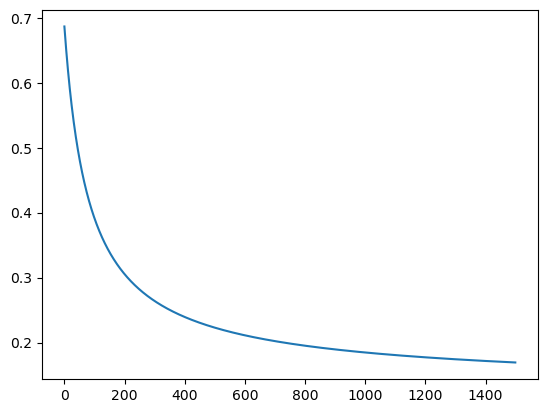

In [175]:
plt.plot(J_storage)

**CS6.** Create a function `build_model_logreg()` that perform the following steps:
- change all data to numpy array.
- normalize the training feature data set using `normalize_z()` function.
- create X matrix.
- use `reshape(-1, 1)` on the target array to make sure it is a column vector. 
- run gradient descent by calling `gradient_descent_logreg()` function.

This function should output `model` and `J_storage` where `model` is a dictionary containing `beta`, `means` and `stds`. 

In [176]:
def build_model_logreg(df_feature_train: pd.DataFrame,
                       df_target_train: pd.DataFrame,
                       beta: Optional[np.ndarray] = None,
                       alpha: float = 0.01,
                       iterations: int = 1500) -> tuple[dict[str, Any], np.ndarray]:
    if beta is None:
        beta = np.zeros((df_feature_train.shape[1] + 1, 1)) 
    assert beta.shape == (df_feature_train.shape[1] + 1, 1)
    model: dict[str, Any] = {}
    
    array_feature_train_z, means, stds = normalize_z(df_feature_train.to_numpy())
    m, n = df_features_train.shape
    
    X: np.ndarray = prepare_feature(array_feature_train_z)
    target: np.ndarray = df_target_train.to_numpy()
    
    beta, J_storage = gradient_descent_logreg(X, target, beta, alpha, iterations)
    
    model = {"beta": beta, "means": means.reshape((1,n)), "stds": stds.reshape((1,n))}
    J_storage = J_storage.reshape(-1, 1)
    
    return model, J_storage

In [177]:
columns = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean"]
df_features, df_target = get_features_targets(df, columns, ["diagnosis"])
df_target: pd.DataFrame = replace_target(df_target, "diagnosis", {'M': 1, 'B': 0})

df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)
model, J_storage = build_model_logreg(df_features_train, df_target_train)

assert isinstance(model, dict)
assert "beta" in model
assert "means" in model
assert "stds" in model
assert model["beta"].shape == (8, 1)
ans: np.ndarray = np.array([[-0.6138507], 
                [ 0.8249164],
                [ 0.7274362],
                [ 0.8232587],
                [ 0.8161879],
                [ 0.5057594],
                [ 0.4411595],
                [ 0.7870175]])
assert np.isclose(model["beta"], ans).all()
assert np.isclose(model['means'][0, 0], 1.40347594e+01)
assert np.isclose(model['stds'][-1, -1], 7.54400405e-02)

In [178]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [179]:

# call predict() on one record to get the predicted values
# use the variable 'means' and 'stds' to normalize
input_1row: np.ndarray = np.array([[12.22, 20.04, 79.47, 453.1, 0.10960, 0.11520, 0.08175]])

# replace the None
pred_1row: np.ndarray = predict_logreg(input_1row, model["beta"], model["means"], model["stds"])

###
### YOUR CODE HERE
###


In [180]:
assert pred_1row[0][0] == 0

In [181]:
# call predict() on df_features test dataset to get the predicted values
pred: np.ndarray = predict_logreg(df_features_test.to_numpy(), model["beta"], model["means"], model["stds"])

###
### YOUR CODE HERE
###


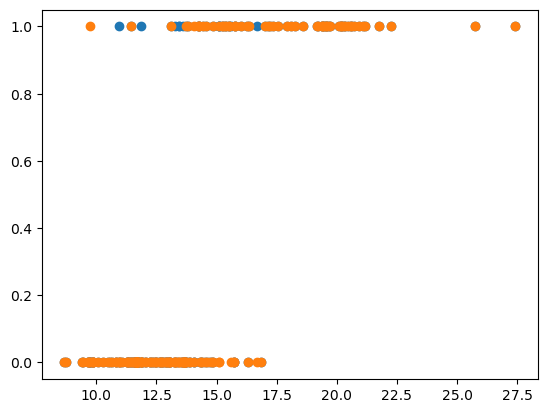

In [182]:
plt.scatter(df_features_test["radius_mean"], df_target_test)
plt.scatter(df_features_test["radius_mean"], pred)

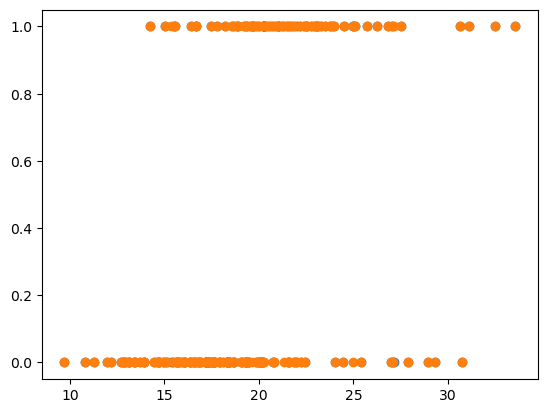

In [183]:
plt.scatter(df_features_test["texture_mean"], df_target_test)
plt.scatter(df_features_test["texture_mean"], pred)

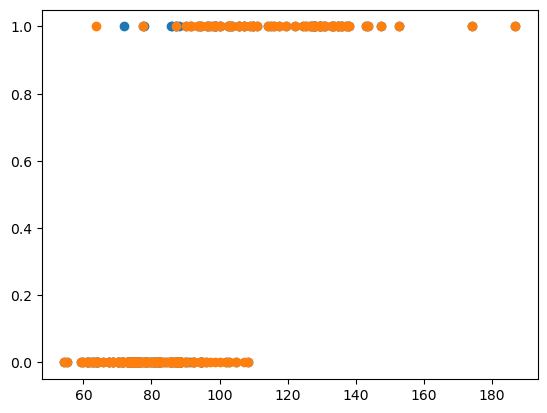

In [184]:
plt.scatter(df_features_test["perimeter_mean"], df_target_test)
plt.scatter(df_features_test["perimeter_mean"], pred)

**CS7.** *Confusion Matrix:* Write a function `confusion_matrix()` that takes in:
- `ytrue`: which is the true target values
- `ypred`: which is the predicted target values
- `labels`: which is a list of the category. In the above case it will be `[1, 0]`. Put the positive case as the first element of the list. 

The function should return a dictionary containing the matrix with the following format.

|                 | predicted positive (1) | predicted negative (0) |
|-----------------|--------------------|--------------------|
| actual positive (1) | correct positive  (1, 1) | false negative (1, 0)    |
| actual negative (0) | false positive (0, 1)   | correct negative (0, 0)   |

The keys to the dictionary are the indices: `(0, 0), (0, 1), (1, 0), (1, 1)`.

You can use the following function in your code:
- `itertools.product()`: this is to create a combination of all the labels. 

In [185]:
import itertools
def confusion_matrix(ytrue: np.ndarray, 
                     ypred: np.ndarray, 
                     labels: list[int]) -> dict[tuple[int, int], int]:
    output: dict[tuple[int, int], int] = {}
    keys = itertools.product(labels, labels)
    
    for key in keys:
        output[key] = 0;
    
    n, m = ytrue.shape
    for i in range(n):
        y_i = ytrue[i][0]
        y_hat_i = ypred[i][0]
        key = (y_i, y_hat_i)
        output[key] += 1
    return output


In [186]:
result: dict[tuple[int, int], int] = confusion_matrix(df_target_test.values, pred, [1,0])
print(result)
assert result == {(0, 0): 99, (0, 1): 2, (1, 0): 10, (1, 1): 59}

{(1, 1): 59, (1, 0): 10, (0, 1): 2, (0, 0): 99}


In [187]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**CS8.** *Metrics:* Write a function `calc_accuracy()` that takes in a Confusion Matrix array and output a dictionary with the following keys and values:
- `accuracy`: total number of correct predictions / total number of records
- `sensitivity`: total correct positive cases / total positive cases
- `specificity`: total true negatives / total negative cases
- `precision`: total  of correct positive cases / total predicted positive cases

In [188]:
def calc_accuracy(cm: dict[tuple[int, int], int]) -> dict[str, float]:
    tp, fn, fp, tn = cm[(1,1)], cm[(1,0)], cm[(0,1)], cm[(0,0)]
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    sensitivity = tp/(tp+fn)
    specificity  = tn/(fp+tn)
    
    
    result: dict[str, float] = {'accuracy': accuracy, 'sensitivity': sensitivity,
              'specificity': specificity, 'precision': precision}
    return result


In [189]:
ans: dict[str, float] = calc_accuracy(result)
# print(ans)
expected = {'accuracy': 0.9294, 'sensitivity': 0.8551, 'specificity': 0.9802, 'precision': 0.9672}
assert np.isclose(ans['accuracy'], expected['accuracy'], rtol=1e-3)
assert np.isclose(ans['sensitivity'], expected['sensitivity'], rtol=1e-3)
assert np.isclose(ans['specificity'], expected['specificity'], rtol=1e-3)
assert np.isclose(ans['precision'], expected['precision'], rtol=1e-3)
 

In [190]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**CS9.** *Optional:* Redo the above tasks using Scikit Learn libraries. You will need to use the following:
- [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm_sk

In [192]:
columns: list[str] = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean"]
# get the features and the columns
# df_features, df_target = None

# replace target values with 0 and 1
# df_target: pd.DataFrame = None

###
### YOUR CODE HERE
###


In [193]:
# split data set using random_state = 100 and 30% test size
# df_features_train, df_features_test, df_target_train, df_target_test = None, None, None, None

# change feature to numpy array and append column of 1s
# feature: np.ndarray = None

# change target to numpy array
# target: np.ndarray = None

# this is to ensure it is either 0 or 1

###
### YOUR CODE HERE
###
target: np.ndarray = target.astype(int) 
print(target.shape)

(399, 1)


In [194]:
# create LogisticRegression object instance, use newton-cg solver
# model: LogisticRegression = None

# build model
# pass

# get predicted value
# pred: np.ndarray = None

###
### YOUR CODE HERE
###


In [195]:
# calculate confusion matrix
# cm: dict[tuple[int, int], int] = None

###
### YOUR CODE HERE
###


In [196]:
expected: np.ndarray = np.array([[58,  11], [6, 96]])
assert np.array(cm == expected).all()

NameError: name 'cm' is not defined

In [ ]:
plt.scatter(df_features_test["radius_mean"], df_target_test)
plt.scatter(df_features_test["radius_mean"], pred)

In [ ]:
plt.scatter(df_features_test["texture_mean"], df_target_test)
plt.scatter(df_features_test["texture_mean"], pred)

In [ ]:
plt.scatter(df_features_test["perimeter_mean"], df_target_test)
plt.scatter(df_features_test["perimeter_mean"], pred)